In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
from sympy import symbols, diff, solve
from sympy.abc import x

In [2]:
L = 122.0 # mm
R = 3.31 # mm
Mcan = 14 # g
rho_soda = 1.026 # g/mL
C = Mcan / (rho_soda * np.pi * R**2)
h = np.linspace(0, L, 1001)

def RCM(H):
    return (C*L/2 + H**2/2) / (C+H)
Rcm = RCM(h)

# Convert the function to a symbolic expression
expr = RCM(x)
# Take the derivative
f_prime = diff(expr, x)
# Solve for x where the derivative equals zero
solutions = solve(f_prime, x)
# Print the solutions
print(solutions)
# choose the physically relevant solution
h_min= solutions[1]

[-7.36225033226790, 6.56937517541552]


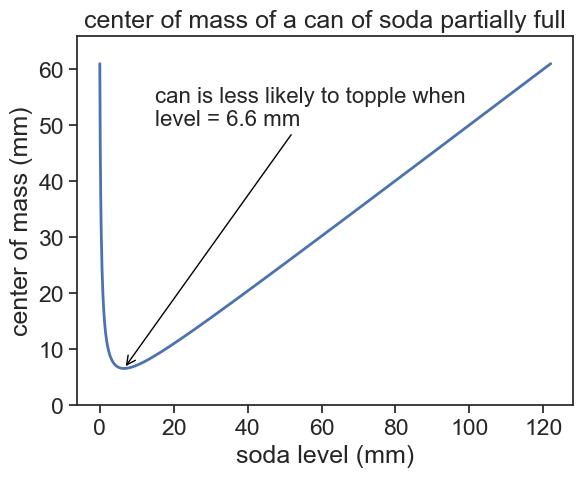

In [4]:
fig, ax = plt.subplots(1)
ax.plot(h, Rcm, lw=2)
ax.annotate(f"can is less likely to topple when\nlevel = {h_min:.1f} mm",
            xy=(h_min, RCM(h_min)), xycoords='data',
            xytext=(15, 50), textcoords='data',
            size=16,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color="black"),
            )
ax.set(
    xlabel="soda level (mm)",
    ylabel="center of mass (mm)",
    ylim=[0,L/2+5],
    title="center of mass of a can of soda partially full")
fig.savefig("can_graph.png", bbox_inches='tight', dpi=300)